# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 1: Using Git and Python for Collaborative Coding in Google Colab*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Shaikh Sikander | Ali | Shaikh Sikander Ali,16/10/2024 | 6 | 25% |
| Member 2: | Amir | Khan | Amir Khan, 14/10/2024 | 6 | 25% |
| Member 3: | Nasir Ahmad | Ahmad | Nasir Ahmad ,15/10/2024 | 6 | 25% |
| Member 4: | Taranvir | Hundal | Taranvir Hundal, 12/10/2024 | 6 | 25% |


# **Linear LSE**
### (40 Marks)

### **Curve Fitting**

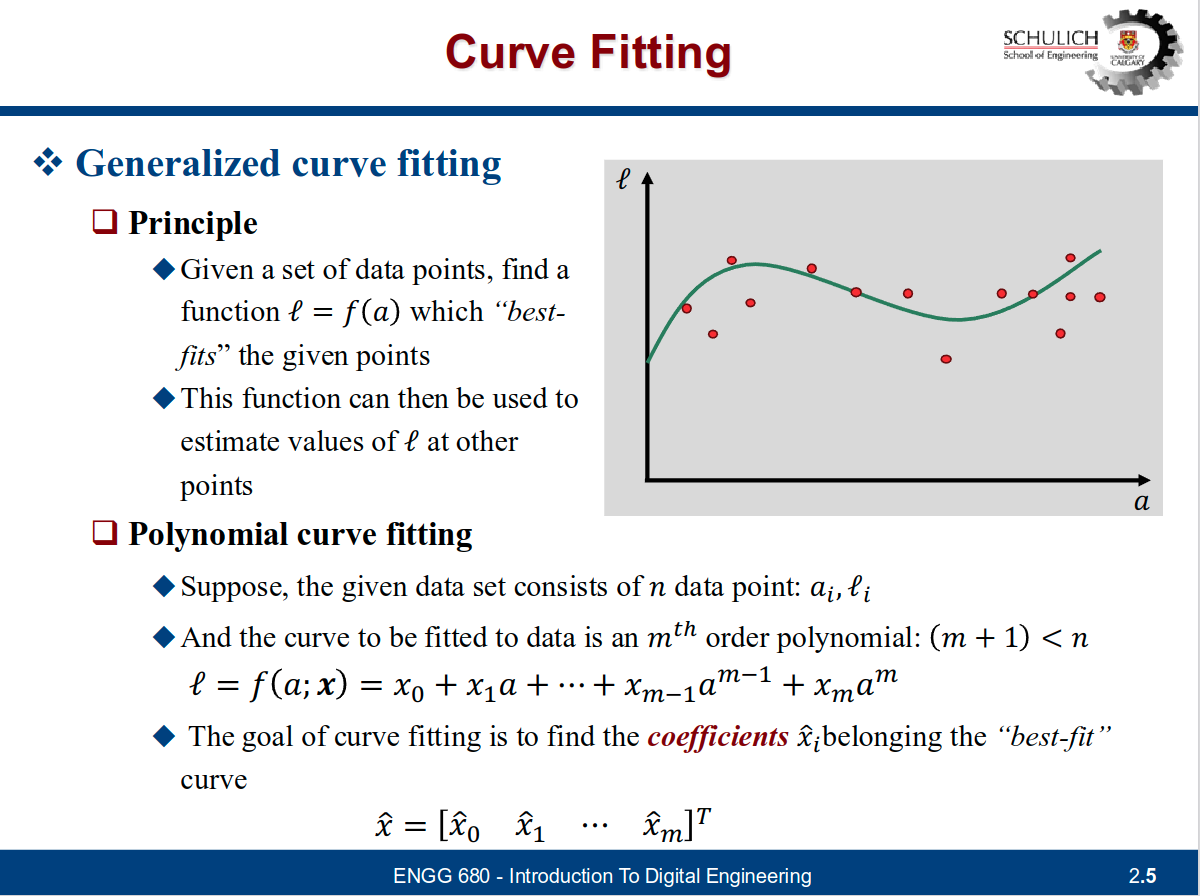

### **Observations:** values of a function f(a) in range of -π to π, contaminated with random noise

### **Unknown States:** coefficients of polynomial functions for curve fitting

In [ ]:
# step 1
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# step 2
# Load data.xlsx file, which contains the observations (with noise), variance of observations and true observations
# hint: use pandas library to parse excel file and use numpy library to convert it to array
# (1 mark)
# Data Loading from Pandas Library
df_data = pd.read_excel('data.xlsx');

#Convert Dataframe into numpy array
arr_data = df_data.to_numpy();

#store the noisy observations, variance of observations and true observations into numpy arrays seperately
# (1 mark)
l = arr_data[:, 0]  # Noisy observations
l_var = arr_data[:, 1]  # Variance of observations
l_true = arr_data[:, 2]  # True observations

In [ ]:
# step 3
# define the number of observation n
# (1 mark)
n = len(l)
print("Number of Observations ==>",n)
# define the observation weight matrix P for LSE as identity matrix
# identity weight matrix simply means the observations will be unweighted in the following LSE
# (1 mark)
P = np.eye(n)

# define the range of function input(i.e., constants a), from start to end; and the numerical array of a
start = -1* np.pi
end = np.pi
a = np.linspace(start, end, n)


Number of Observations ==> 500


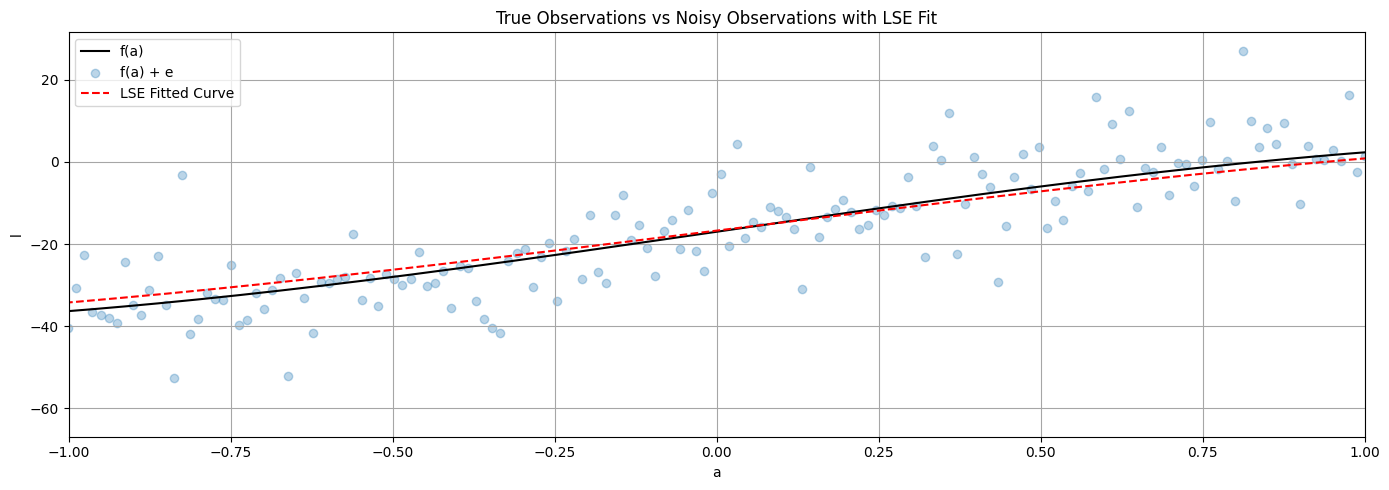

<Figure size 640x480 with 0 Axes>

In [ ]:
# step 4
# use the matplotlib to plot the true and noisy observations together in one single figure
# use scatter for noisy observation plotting
# for the true observation, label it as "f(a)"" and set color as 'k'
# for the noisy observation scatter plot, label it as "f(a) + e", set color as 'tab:blue', set marker as 'o' and set alpha as 0.3
# include proper axis labels, legend and title
# scale the range of x-axis to be -1 to 1
# keep this format for the rest of the plots in this lab assignment
# (2 marks)

# Function to fit a polynomial curve using Linear Least Squares Estimation (LSE)
def fit_polynomial_curve(a, l, degree):
    # Construct the design matrix (Vandermonde matrix) for polynomial fitting
    A = np.vander(a, N=degree + 1, increasing=True)

    # Solve the normal equation: (A^T * A) * x = A^T * l
    # Using np.linalg.solve to efficiently compute the solution for x (coefficients)
    ATA = A.T @ A  # A^T * A
    ATb = A.T @ l  # A^T * l
    coeffs = np.linalg.solve(ATA, ATb)  # Solve for coefficients (x)

    return coeffs

# Fit a polynomial curve (e.g., degree 3) to the noisy data
degree = 3
coeffs = fit_polynomial_curve(a, l, degree)

# Evaluate the polynomial using the fitted coefficients
l_fitted = np.polyval(np.flip(coeffs), a)

# Create a plot using matplotlib
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

# Plot the true observations (f(a)) - using a line plot
ax.plot(a, l_true, label="f(a)", color='k')

# Plot the noisy observations (f(a) + e) - using scatter plot
ax.scatter(a, l, label="f(a) + e", color='tab:blue', marker='o', alpha=0.3)

# Plot the fitted curve - using a line plot (to show LSE fit)
ax.plot(a, l_fitted, label="LSE Fitted Curve", color='r', linestyle='--')

# Set axis labels and title
ax.set_xlabel("a")
ax.set_ylabel("l")
ax.set_title("True Observations vs Noisy Observations with LSE Fit")

# Add legend
ax.legend()

# Set x-axis range to be -1 to 1
ax.set_xlim(-1, 1)

# Add grid
ax.grid(True, which='both', ls='-', color='0.65')

# Adjust layout
fig.tight_layout()

# Show the plot
plt.show()

# Saving the file
plt.savefig('TrueObservations VS Noisy Observations.png')

In [ ]:
# step 5
# define a curve fitting function named fit_polynomial_curve
# the function should implement the linear least square estimation
# the function should include all important intermediate steps in LSE
# the input and output of the funciton are described in the comment below in red.
# please keep code clean and well-commented
# (9 marks)

def fit_polynomial_curve(a: np.ndarray, l: np.ndarray, P: np.ndarray, deg: int) -> tuple:
    '''
    Args:
        a:              function input (constants)
        l:              noisy observations
        P:              observation weight matrix
        deg:            degree of polynomial to fit to data
    Returns:
        x:              estimated polynomial coefficients
        cov_x:          uncertainty in estimated coefficients
        apv:            a posteriori variance factor (goodness of fit)
        v:              observation residuals
    '''

    # Step 1: Construct the design matrix A for polynomial fitting
    # Each row of A contains [1, a, a^2, ..., a^deg]
    A = np.vander(a, deg + 1, increasing=True)

    # Step 2: Apply the weight matrix P (observation weight matrix)
    # Multiply the design matrix A and the noisy observations l by P
    A_weighted = P @ A
    l_weighted = P @ l

    # Step 3: Estimate polynomial coefficients (x) using LSE formula
    # x = (A^T * P * A)^(-1) * (A^T * P * l)
    AtA = A_weighted.T @ A_weighted
    Atl = A_weighted.T @ l_weighted
    x = np.linalg.inv(AtA) @ Atl

    # Step 4: Compute covariance matrix of estimated coefficients
    # cov_x = (A^T * P * A)^(-1)
    cov_x = np.linalg.inv(AtA)

    # Step 5: Calculate the observation residuals (v)
    # Residuals: v = l - A * x
    l_predicted = A @ x
    v = l - l_predicted

    # Step 6: Compute the a posteriori variance factor (apv) (goodness of fit)
    # apv = (v^T * P * v) / (n - deg - 1), where n is the number of observations
    n = len(l)
    apv = (v.T @ P @ v) / (n - deg - 1)

    return (x, cov_x, apv, v)


In [ ]:
# step 6
# call the fit_polynomial_curve function and fetch the results
# use polynomial degrees of: 1, 3 ,5
# (1 marks)

# Degree 1
x_deg1, cov_x_deg1, apv_deg1, v_deg1 = fit_polynomial_curve(a, l, P, deg=1)
print(f"Degree 1 - Coefficients: {x_deg1}, APV: {apv_deg1}")

# Degree 3
x_deg3, cov_x_deg3, apv_deg3, v_deg3 = fit_polynomial_curve(a, l, P, deg=3)
print(f"Degree 3 - Coefficients: {x_deg3}, APV: {apv_deg3}")

# Degree 5
x_deg5, cov_x_deg5, apv_deg5, v_deg5 = fit_polynomial_curve(a, l, P, deg=5)
print(f"Degree 5 - Coefficients: {x_deg5}, APV: {apv_deg5}")


Degree 1 - Coefficients: [-16.59352348   7.25633807], APV: 162.742608604322
Degree 3 - Coefficients: [-16.72496774  19.63961372   0.03979476  -2.08281013], APV: 66.13227783131883
Degree 5 - Coefficients: [-1.65770980e+01  2.28207004e+01 -1.09433276e-01 -3.58096979e+00
  1.75697706e-02  1.36073672e-01], APV: 63.75834463018419


In [ ]:
# step 7
# use the estimated coefficients x and constants array a, construct polynomial functions for each degree
# hint: use polyval function from numpy library (check input argument carefully)
# (1 marks)

# Use np.polyval to evaluate the polynomial at each point in the array 'a'

# For degree 1 (linear)
line_uw = np.polyval(np.flip(x_deg1), a)  # np.polyval expects coefficients in reverse order

# For degree 3 (cubic)
cubic_uw = np.polyval(np.flip(x_deg3), a)

# For degree 5 (quintic)
quintic_uw = np.polyval(np.flip(x_deg5), a)

# The result is that line_uw, cubic_uw, and quintic_uw now contain the evaluated polynomial values
# at each point in the array 'a' for the respective degrees

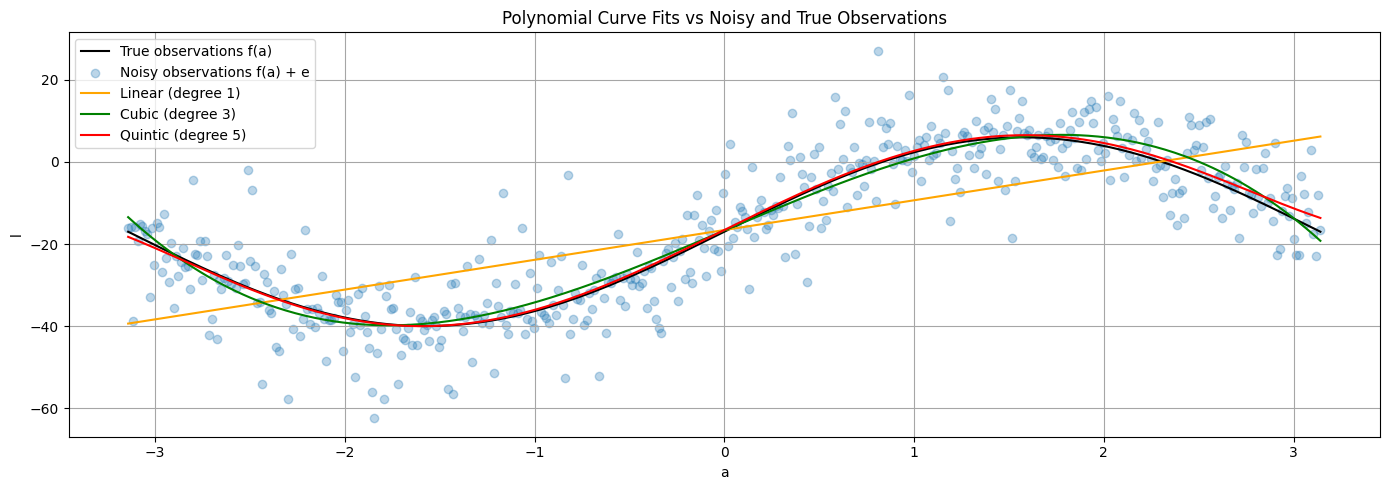

<Figure size 640x480 with 0 Axes>

In [ ]:
# step 8
# use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))
# Plot the true observations (f(a)) - using a line plot
ax.plot(a, l_true, label="True observations f(a)", color='k')

# Plot the noisy observations (f(a) + e) - using scatter plot
ax.scatter(a, l, label="Noisy observations f(a) + e", color='tab:blue', marker='o', alpha=0.3)

# Plot the polynomial fits: line (degree 1), cubic (degree 3), and quintic (degree 5)
ax.plot(a, line_uw, label="Linear (degree 1)", color='orange')
ax.plot(a, cubic_uw, label="Cubic (degree 3)", color='green')
ax.plot(a, quintic_uw, label="Quintic (degree 5)", color='red')

# Set axis labels and title
ax.set_xlabel("a")
ax.set_ylabel("l")
ax.set_title("Polynomial Curve Fits vs Noisy and True Observations")

# Add legend
ax.legend()

# Add grid
ax.grid(True, which='both', ls='-', color='0.65')

# Adjust layout
fig.tight_layout()

# Show the plot
plt.show()

# Saving the file
plt.savefig('Polynomial Curve Fits vs Noisy and True Observations.png')

In [ ]:
# step 9
# print the a posterier variance factor for each polynomial function
# (3 marks)

# For degree 1 (Linear)
print(f"A Posteriori Variance Factor for Linear (degree 1): {apv_deg1:.4f}")

# For degree 3 (Cubic)
print(f"A Posteriori Variance Factor for Cubic (degree 3): {apv_deg3:.4f}")

# For degree 5 (Quintic)
print(f"A Posteriori Variance Factor for Quintic (degree 5): {apv_deg5:.4f}")



A Posteriori Variance Factor for Linear (degree 1): 162.7426
A Posteriori Variance Factor for Cubic (degree 3): 66.1323
A Posteriori Variance Factor for Quintic (degree 5): 63.7583


In [ ]:
# step 10
# compute and print the norm between the predicted observations (output from each polynomial function) and the true observations
# (3 marks)

# L2-norm for Linear (degree 1)
l2_norm_deg1 = np.linalg.norm(line_uw - l_true)
print(f"L2-norm between predicted and true observations for Linear (degree 1): {l2_norm_deg1:.4f}")

# L2-norm for Cubic (degree 3)
l2_norm_deg3 = np.linalg.norm(cubic_uw - l_true)
print(f"L2-norm between predicted and true observations for Cubic (degree 3): {l2_norm_deg3:.4f}")

# L2-norm for Quintic (degree 5)
l2_norm_deg5 = np.linalg.norm(quintic_uw - l_true)
print(f"L2-norm between predicted and true observations for Quintic (degree 5): {l2_norm_deg5:.4f}")

L2-norm between predicted and true observations for Linear (degree 1): 229.0602
L2-norm between predicted and true observations for Cubic (degree 3): 38.2860
L2-norm between predicted and true observations for Quintic (degree 5): 17.3700


In [ ]:
# step 11
# comment on the results of a posterier variance factor and norm, what pattern do you observe
# (2 marks)
# ...


The a posteriori variance factor (APV) and L2-norm results for the polynomial fits of degrees 1, 3, and 5 show the following patterns:

**A Posteriori Variance Factor (APV):**

**Degree 1 (Linear):** High APV (162.74) shows a poor fit, with large residuals between observed and predicted values.

**Degree 3 (Cubic):** APV drops to 66.13, indicating a much better fit by capturing more complex patterns.

**Degree 5 (Quintic):** APV further decreases to 63.76, but the improvement from degree 3 to 5 is minor compared to the jump from degree 1 to 3.

**L2-Norm:**

**Degree 1 (Linear):** High L2-norm (229.06) indicates a large overall error.

**Degree 3 (Cubic):** Error drops significantly to 38.29, improving the fit greatly.

**Degree 5 (Quintic):** Further reduction to 17.37, but with smaller improvement compared to the jump from degree 1 to 3.

**Pattern Observed:**


1.  **Higher-degree polynomials provide a better fit:** As we move from degree  1 to degree 5, both the APV and L2-norm decrease, indicating that higher-degree polynomials capture the underlying patterns in the data better.
2.   **Diminishing returns:** While the improvement from linear to cubic is substantial, the improvement from cubic to quintic is less significant. This suggests that after a certain degree, increasing the complexity of the polynomial model yields diminishing returns in fit quality.




In [ ]:
# step 12
# now, let's define the P matrix with the proper weights of observation
# use the variance of observation l_var, define P matrix
# (1 mark)

# P is a diagonal matrix with weights as the inverse of the variance of observations (l_var)
P = np.diag(1 / l_var)

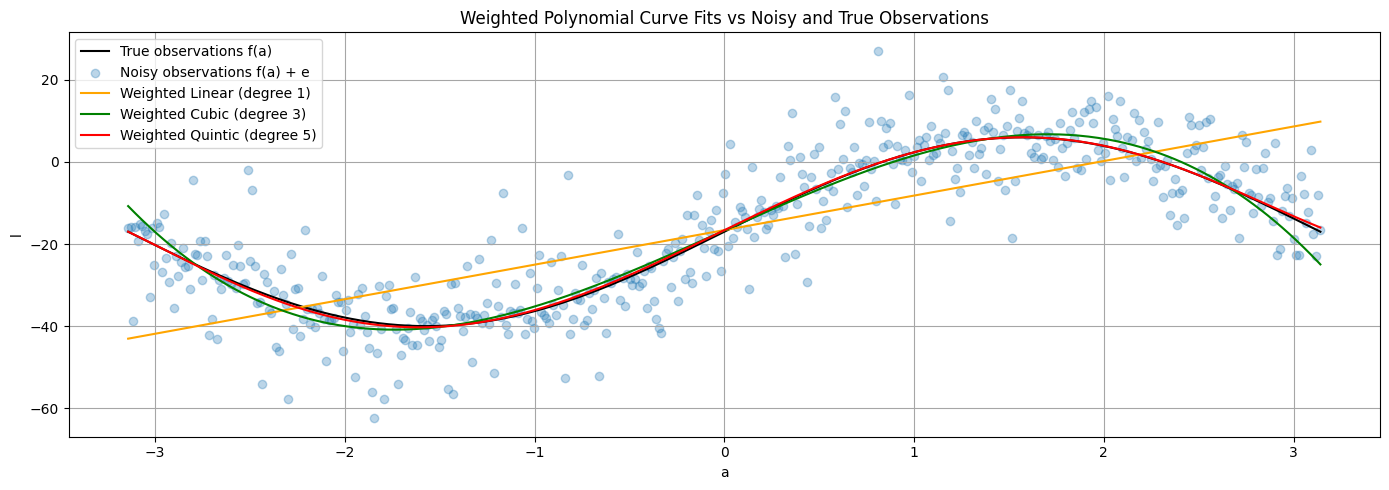

A Posteriori Variance Factor for Weighted Linear (degree 1): 12.2217
A Posteriori Variance Factor for Weighted Cubic (degree 3): 1.1782
A Posteriori Variance Factor for Weighted Quintic (degree 5): 0.9484
L2-norm between predicted and true observations for Weighted Linear (degree 1): 236.3724
L2-norm between predicted and true observations for Weighted Cubic (degree 3): 40.5212
L2-norm between predicted and true observations for Weighted Quintic (degree 5): 6.8318


<Figure size 640x480 with 0 Axes>

In [ ]:
# step 13
# repeat the steps 6-10, using the proper P matrix
# (10 marks)
# ...

# Step 6: Call the fit_polynomial_curve function and fetch the results for degrees 1, 3, and 5

# Degree 1
x_deg1_weighted, cov_x_deg1_weighted, apv_deg1_weighted, v_deg1_weighted = fit_polynomial_curve(a, l, P, deg=1)

# Degree 3
x_deg3_weighted, cov_x_deg3_weighted, apv_deg3_weighted, v_deg3_weighted = fit_polynomial_curve(a, l, P, deg=3)

# Degree 5
x_deg5_weighted, cov_x_deg5_weighted, apv_deg5_weighted, v_deg5_weighted = fit_polynomial_curve(a, l, P, deg=5)

# Step 7: Use the estimated coefficients and construct the polynomial functions

# For degree 1 (linear)
line_weighted = np.polyval(np.flip(x_deg1_weighted), a)

# For degree 3 (cubic)
cubic_weighted = np.polyval(np.flip(x_deg3_weighted), a)

# For degree 5 (quintic)
quintic_weighted = np.polyval(np.flip(x_deg5_weighted), a)

# Step 8: Plot each polynomial function along with the noisy and true observations

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

# Plot the true observations (f(a)) - using a line plot
ax.plot(a, l_true, label="True observations f(a)", color='k')

# Plot the noisy observations (f(a) + e) - using scatter plot
ax.scatter(a, l, label="Noisy observations f(a) + e", color='tab:blue', marker='o', alpha=0.3)

# Plot the weighted polynomial fits: line (degree 1), cubic (degree 3), and quintic (degree 5)
ax.plot(a, line_weighted, label="Weighted Linear (degree 1)", color='orange')
ax.plot(a, cubic_weighted, label="Weighted Cubic (degree 3)", color='green')
ax.plot(a, quintic_weighted, label="Weighted Quintic (degree 5)", color='red')

# Set axis labels and title
ax.set_xlabel("a")
ax.set_ylabel("l")
ax.set_title("Weighted Polynomial Curve Fits vs Noisy and True Observations")

# Add legend
ax.legend()

# Add grid
ax.grid(True, which='both', ls='-', color='0.65')

# Adjust layout
fig.tight_layout()

# Show the plot
plt.show()

# Saving the file
plt.savefig('Weighted Polynomial Curve Fits vs Noisy and True Observations.png')

# Step 9: Print the a posteriori variance factor for each polynomial function

# For degree 1 (Linear)
print(f"A Posteriori Variance Factor for Weighted Linear (degree 1): {apv_deg1_weighted:.4f}")

# For degree 3 (Cubic)
print(f"A Posteriori Variance Factor for Weighted Cubic (degree 3): {apv_deg3_weighted:.4f}")

# For degree 5 (Quintic)
print(f"A Posteriori Variance Factor for Weighted Quintic (degree 5): {apv_deg5_weighted:.4f}")

# Step 10: Compute and print the L2-norm between the predicted and true observations

# L2-norm for Linear (degree 1)
l2_norm_deg1_weighted = np.linalg.norm(line_weighted - l_true)
print(f"L2-norm between predicted and true observations for Weighted Linear (degree 1): {l2_norm_deg1_weighted:.4f}")

# L2-norm for Cubic (degree 3)
l2_norm_deg3_weighted = np.linalg.norm(cubic_weighted - l_true)
print(f"L2-norm between predicted and true observations for Weighted Cubic (degree 3): {l2_norm_deg3_weighted:.4f}")

# L2-norm for Quintic (degree 5)
l2_norm_deg5_weighted = np.linalg.norm(quintic_weighted - l_true)
print(f"L2-norm between predicted and true observations for Weighted Quintic (degree 5): {l2_norm_deg5_weighted:.4f}")


In [ ]:
# step 14
# Compare the results of a posterier variance factor and norm from unweighted LSE and weighted LSE, what phenomena do you observe? Explain this phenomena.
# (2 marks)
# ...

**Comparison of Unweighted LSE and Weighted LSE Results**
**1**

**1.A Posteriori Variance Factor (APV):**

**Unweighted LSE:**

1.   Linear (degree 1): 162.7426
2.   Cubic (degree 3): 66.1323
3.   Quintic (degree 5): 63.7583

**Weighted LSE:**

1.   Linear (degree 1): 12.2217
2.   Cubic (degree 3): 1.1782
3.   Quintic (degree 5): 0.9484

**2. L2-Norm (between predicted and true observations):**

**Unweighted LSE:**

1.   Linear (degree 1):  229.0602
2.   Cubic (degree 3):  38.2860
3.   Quintic (degree 5): 17.3700

**Weighted LSE:**

1.   Linear (degree 1): 236.3724
2.   Cubic (degree 3): 40.5212
3.   Quintic (degree 5): 6.8318

**Phenomena Observed:**

**Improvement in A Posteriori Variance Factor (APV):**

APV values are lower in weighted LSE than in unweighted LSE, indicating a better fit, especially for higher-degree polynomials. Weighted LSE improves accuracy by assigning lower weights to observations with higher variance.

**Slightly Higher L2-Norm for Linear Polynomial:**

For the linear model, the L2-norm increases from 229.06 to 236.37 with weighted LSE, showing minimal improvement. Linear models lack the flexibility to capture complex data, and weighting has limited impact.

**Significant Reduction in L2-Norm for Quintic Polynomial:**

The quintic polynomial’s L2-norm drops from 17.37 to 6.83 with weighted LSE, indicating better accuracy by minimizing the influence of noisy data points.

**Explanation:**

Weighted LSE improves the fit by reducing the impact of noisy observations through lower weights, allowing reliable data to have greater influence. Higher-degree models like cubic and quintic benefit more due to their flexibility in capturing complex patterns.

Overall, weighted LSE provides a more accurate model when the dataset has varying levels of noise or uncertainty across observations.



# **Non-linear LSE**
### (35 Marks)

### **SinglePointPositioning**

### **Observations:** Pseudorange [m]

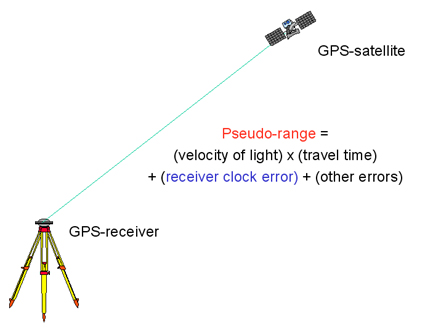

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+ϵ_{sum}$$ and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$ϵ_{sum}=general\ errors\ term\ (ϵ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them in the following Least Square Estimation.

In [ ]:
# step 1
# Load the psuedorange measurements and satellites' positions files, store them in the format of numpy array
# (hint: use pandas library to parse excel files into dataframe first, then convert them to numpy arrays)
# (1 marks)
import pandas as pd
import numpy as np
df_pseudorange = pd.read_excel('pseudoranges.xlsx')
df_sat_pos = pd.read_excel('satellite_position.xlsx')

pseudorange = df_pseudorange.to_numpy()
sat_pos = df_sat_pos.to_numpy()

In [ ]:
# step 2
# define the number of measurements n and the number of states m
# (2 mark)
n = pseudorange.shape[0]
m = 4

In [ ]:
# step 3
# Given that the variance of observation is 1 (m^2), define the weight matrix P
# (1 marks)
P = np.eye(n)

print("Weight matrix P:")
print(P)

Weight matrix P:
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
# step 4
# set the initial states as zeros:
# (1 mark)
x_0 = np.zeros(m)

print("Initial states (x_0):")
print(x_0)

Initial states (x_0):
[0. 0. 0. 0.]


In [ ]:
# step 5
# GroundTruth coordiantes of the receiver
GroundTruth=np.array([-1633489.37967725,	-3651627.18250363,	4952481.61954918])

In [ ]:
# step 6
# initialize the corrections array as ones, iteration loop counter i as zero and related arrays
# (2 mark)
delta = np.ones(m) # Corrections array initialized as ones
i = 0 # Loop counter initialized to zero
arr_w = []
arr_delta=[]
arr_err_pos = []
arr_i = []
x_hat = x_0.copy()

print("Initialized values:")
print(f"Delta: {delta}")
print(f"Iteration counter (i): {i}")
print(f"x_hat (initial states): {x_hat}")

Initialized values:
Delta: [1. 1. 1. 1.]
Iteration counter (i): 0
x_hat (initial states): [0. 0. 0. 0.]


In [ ]:
# step 7
# define a function called euclidean_norm, which computes the geometric distances between satellites and receiver
# the input of the function should be two arrays: receiver_pos and satellite_pos
# the function should return an array of distance between satellites and receiver
# you can either use the numpy function or code the math manually
# (1 marks)
def euclidean_norm(receiver_pos, satellite_pos):
  distance = np.sqrt(np.sum((satellite_pos[:, :3] - receiver_pos) ** 2, axis=1))
  return distance



In [ ]:
# step 8
# define a function named design_matrix which computes the design matrix A of this LSE problem
# the input of this funciton should be: estimated states array, satellites positions array and geometric distance array
# the function should return an two-dimensional array which represents the design matrix A
# (2 marks)
def design_matrix(r_pos, s_pos, rho):
     # Number of satellites
    n = s_pos.shape[0]
    A = np.zeros((n, 4))

    # Compute each row of the design matrix

    for i in range(n):
        A[i, 0] = (r_pos[0] - s_pos[i, 0]) / rho[i]
        A[i, 1] = (r_pos[1] - s_pos[i, 1]) / rho[i]
        A[i, 2] = (r_pos[2] - s_pos[i, 2]) / rho[i]
        A[i, 3] = 1
    return A

In [ ]:
# step 9
# start the iteration for the LSE (11 marks in total)
# define the convergence criteria for the 'while' loop
# the convergence criteria is that the corrections delta are less than 0.001 (i.e., <0.1 m), for receiver's position x,y,z part
# (1 marks)

# Define convergence criteria and max iterations
convergence_criteria = 0.001
max_iterations = 1000

while np.linalg.norm(delta[:3]) > convergence_criteria and i < max_iterations:
    rho = euclidean_norm(x_hat[:3], sat_pos)  # Correcting the state dimension
    A = design_matrix(x_hat[:3], sat_pos, rho)

    w = pseudorange[:, 0] - (rho + x_hat[3])  # Including clock bias (x_hat[3])
    delta = np.linalg.inv(A.T @ P @ A + 1e-6 * np.eye(A.shape[1])) @ (A.T @ P @ w)

    x_hat += delta

    err_pos = np.linalg.norm(x_hat[:3] - GroundTruth)  # Error position excluding clock bias
    i += 1

    arr_w.append(w)
    arr_delta.append(delta)
    arr_err_pos.append(err_pos)
    arr_i.append(i)

apv = (w.T @ P @ w) / (n - m)
C_x_hat = np.linalg.inv(A.T @ P @ A)



In [ ]:

# step 10
"""
Print:
      {estimated states,
       corrections array,
       estimated measurements residuals,
       A posteriori Variance of Unit Weight,
       Covariance matrix of estimated states,
       number of iterations,
       3-D position errors},

after the LSE convergence to the console.
"""
# (7 marks)

print(x_hat)
print(delta)
print(w)
print(apv)
print(C_x_hat)
print(i)
print(err_pos)


[-2.81854158e+09 -1.39814854e+06 -4.37110687e+06 -2.81860569e+09]
[-7.07638885e+05 -7.96963442e-03 -8.96002331e-03 -7.07622784e+05]
[-23006.78949881  14277.66339588 -13811.69152832  12559.49484873
 -20888.20733929 -11562.82139015  10815.70873451   5672.18626976
   6123.47735786 -21349.61275864  41169.83917475]
569870809.0351441
[[1.99064641e+09 7.98539416e+00 9.14813440e+00 1.99060110e+09]
 [7.98539113e+00 4.73990522e+03 7.54691227e+02 4.90791753e+00]
 [9.14812816e+00 7.54691227e+02 3.86687922e+03 4.49138345e+00]
 [1.99060110e+09 4.90792056e+00 4.49138969e+00 1.99055580e+09]]
1000
2816924419.5681167


In [ ]:
# step 11
# Comment on the computed A Posteriori Variance of Unit Weight value and the Covariance matrix of estimated states
# (2 marks)
"The Posteriori Variance of Unit Weight (APV) at 569870809.0351441 is quite high, which should be closer to 1, suggesting the model fit is poor and not accurately describing the data."
"The Covariance Matrix of Estimated States (C_x_hat) also has high values, which indicates high degree of uncertainty in estimated states. "

'The Covariance Matrix of Estimated States (C_x_hat) also has high values, which indicates high degree of uncertainty in estimated states. '

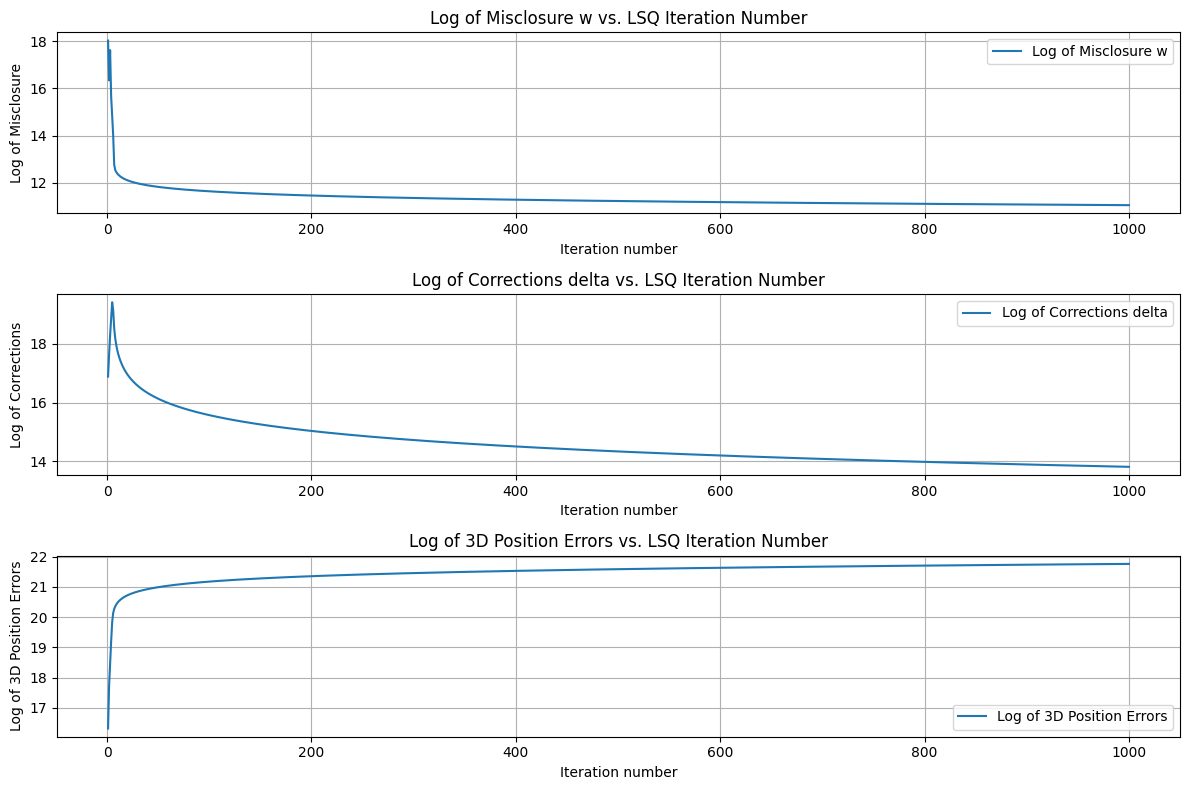

<Figure size 640x480 with 0 Axes>

In [ ]:
# step 12
# Using the imported matplotlib, plot the following (3 marks in total). Make sure to include proper axes information, legend, grid lines and title.
import matplotlib.pyplot as plt
iterations = np.arange(1, len(arr_i) + 1)
log_w = np.log([np.linalg.norm(w) for w in arr_w])
log_delta = np.log([np.linalg.norm(delta) for delta in arr_delta])
log_err_pos = np.log(arr_err_pos)

# 1. Plot log of the misclosure w against the LSQ iteration number i
# (1 marks)
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(iterations, log_w, label='Log of Misclosure w')
plt.xlabel('Iteration number')
plt.ylabel('Log of Misclosure')
plt.title('Log of Misclosure w vs. LSQ Iteration Number')
plt.legend()
plt.grid(True)
plt.savefig('Log of Misclosure w vs. LSQ Iteration Number.png')

# 2. Plot log of the corrections delta against the LSQ iteration number i
# (1 marks)
plt.subplot(3, 1, 2)
plt.plot(iterations, log_delta, label='Log of Corrections delta')
plt.xlabel('Iteration number')
plt.ylabel('Log of Corrections')
plt.title('Log of Corrections delta vs. LSQ Iteration Number')
plt.legend()
plt.grid(True)
plt.savefig('Log of Corrections delta vs. LSQ Iteration Number.png')

# 3. Plot log of the 3D position errors against the LSQ iteration number i
# (1 marks)
plt.subplot(3, 1, 3)
plt.plot(iterations, log_err_pos, label='Log of 3D Position Errors')
plt.xlabel('Iteration number')
plt.ylabel('Log of 3D Position Errors')
plt.title('Log of 3D Position Errors vs. LSQ Iteration Number')
plt.legend()
plt.grid(True)
plt.savefig('Log of 3D Position Errors vs. LSQ Iteration Number.png')

plt.tight_layout()
plt.show()

# Saving the file
plt.savefig('Weighted Polynomial Curve Fits vs Noisy and True Observations.png')

In [ ]:
# step 13
# Describe the phenomena or pattern you recognize for each plot, and explain such phenomena
# (2 marks)
' First plot show a decreasing trend, indicating that the difference between observed and estimated values is reducing with each iteration. As the iterations proceed, the model refines its estimates, reducing the misclosure, meaning the model is converging towards an accurate solution.
" The second plot should show a decreasing trend, reflecting smaller adjustments to the estimated states. As the solution gets closer to the true value, the necessary corrections become smaller. This decreasing delta suggests the model is converging and reaching stability.
" The third plot, A decreasing trend is expected, indicating that the positional error is reducing with each iteration. As iterations proceed, the estimated receiver position should get closer to the actual position, thus reducing the positional error. This is a key indicator of the accuracy of your model.



In [ ]:
# this is just for fun (no marks allocated)
# now you can estimated the receiver's position in Earth-center-earth-fixed (ECEF)
# you can use this tool: https://www.oc.nps.edu/oc2902w/coord/llhxyz.htm to convert it to latitude, longitude and height
# and find where is it on google earth!
"Location is San Francisco, California"